# Introduction 

Hypothesis:
1. Predicting the probability of getting an answer the users query along with a time estimate would help a user plan accordingly.
2. When a problem has multiple possible solutions, ranking the solutions would help users filter out appropriate solutions based on the ranking of the recommendations. 


# Changes

Taking a deep dive into StackOverflow and it's varied functionality, we found that StackOverflow already suggests questions that are very closely realted to the question you are asking or a question that has already been asked. Building upon this, we want to identify problems that span accross languages as well as tie problems that are not "obviously" related together.
The second deviation, is actually an addition we thought of looking at the data. In addition to predicting how long an average response time would be, we can also predict users that could answer this question since we have access to a lot of user data.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import eda_functions
import response_time_estimation
import data_clean_up

8340133.470605774


### Data Clean up

In [ ]:
df = pd.read_csv('stackoverflow_2008.csv')
df["Body_x"] = df["Body_x"].apply(data_clean_up.html_parser)
df["Body_x"] = df["Body_x"].apply(data_clean_up.clean_up_data)
df.to_csv('stackoverflow_2008_clean.csv')

### EDA

#### The Data
For this we would be looking at the Answers, Questions and Tags datasets. The Answers dataset contains coulmns id, OwnerUserId, CreationDate, ParentId and Body. The Questions dataset contains columns Id, OwnerUserId, CreationDate, ClosedDate, Score, Title, Body. The Tags dataset contains columns Id and Title.

### Explaination for Answers
We want a better idea about the popularity of answer and questions, so we do so by visualizing the count of scores based on score value ranges. This can be done by extracting the scores and then putting them in a new columns which have the ranges. The scores are chosen based on the conditions and the count is taken. based on the counts which is in thousands we can clearly see that the mejority of questions and answers are between the score 0 to 5 and most answers and questions have a score of 0. 

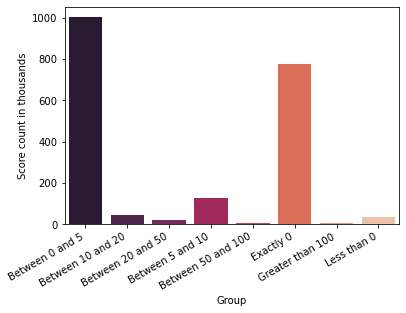

In [2]:
eda_functions.popularity_answers()

### Explaination for Questions
We want a better idea about the popularity of questions, so we do so by visualizing the count of scores based on score value ranges. This can be done by extracting the scores and then putting them in a new column which have the ranges. The scores are chosen based on the conditions and the count is taken. Based on the counts which is in thousands we can clearly see that the majority of Questions have a popularity score of exactly 0 and most questions have a score between 0 and 5.

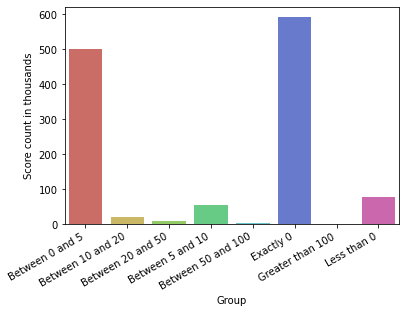

In [3]:
eda_functions.popularity_questions()

### Conclusion
From the above two graphs we can see that most questions and answers between the popularity score of 0 to 5 and exactly 0 are more widely referenced and used rather than the questions and answers with higher or lower popularity score

### 2. Most Popular tags

### Explaination
The barplot below shows tags with highest mean of question score(upvotes on question). This EDA shows that question with these tags are most frequently asked.

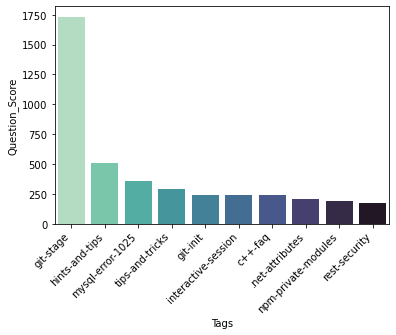

In [2]:
eda_functions.popular_tags()

### Conclusion
From the above graph we can see that most tags that are asked in questions revolve around git-staging questions by a major difference

### 3. Quality of Answers over the years

### Explaination
The barplot given below shows the average score of answers to questions asked every year from 2008-2016. This plot clearly shows the decrease in the quality of answers. It may be due to different reasons like the increase in the number of questions asked or increase in the number of irrelevent answers to question.

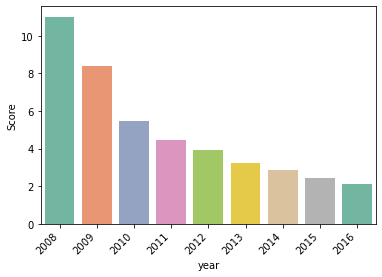

In [3]:
eda_functions.answer_quality()

### Conclusion
From the above graph we can see that the quality of Answers provided has been declining at a constant rate over the years

### Special Visualization

#### Explaination
This graph displays how long a person can expect a reply to its question. The graph shown no of reply a user gets within a day, within a day and a week, within a week and month and more than a month.

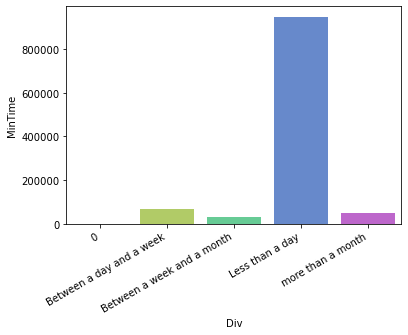

In [2]:
eda_functions.naman()

#### ML Model

We have tried to use regression to estimate the response time but the amount of data is causing a lot of issues in finding the underlying problem. The data we are training are on the Tags of the question and the question body. The error calculated does not seem in line with our expectations. This is going to be our major focus in order to complete the project

In [2]:
response_time_estimation.time_estimate()

7647323.116003025

#### Reflection 

It is our belief that the sheer volume and variety of the data has been our biggest challenge. Whether it be ingesting the API, cleaning the data or formatting it in a way where we could train a model to gain some valuable insights. Due to this reason we feel we can still improve throughout our design pipeline. 
Building upon this reasoning we arrive to the conclusion that we aren't on track with our timeline. To rectify this, we are going to work in a more goal oriented manner. 
While we have reached a place where we could show some concrete results, as iterated earlier, our whole pipeline could use work. Nonetheless, we have ingested the API, cleaned the data and trained a model which does showcase our progress. 
Looking at the data, it seems as if our deviation from initial set goals is supplementing features. We have realized we could do a lot more with the volume and variety of the data we have. 
Moving forward, we plan to focus more on the modeling part of the project. Even though we keep improving on other aspects we are going to focus on our end result. Working with this project so far, the end product, a trained model, is the key aspect in identifying the areas we need to improve on. Once we believe we are in a satisfactory place with our model, we will build out a web application to best showcase our results. 